In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


In [38]:
df = pd.read_csv("batters.csv")

In [39]:
df = df.replace(False, 0)
df = df.replace(True, 1)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [41]:
batters_data = df[df.active_player ==0]
batters_data = batters_data[batters_data.name != 'Walter Alston']
batters_data = batters_data[batters_data.name != 'Pete Rose']
batters_data = batters_data[batters_data.name != 'Barry Bonds']
batters_data = batters_data[batters_data.name != 'Don Bennett']
batters_data = batters_data[batters_data.name != 'Jessop']
batters_data = batters_data[batters_data.name != 'Charlie Lindstrom']
# Take out manager, statistical outliers - doesn't belong in player data
batters_data = batters_data.dropna() # Drops all null values

<AxesSubplot:xlabel='years_played', ylabel='hall_of_fame'>

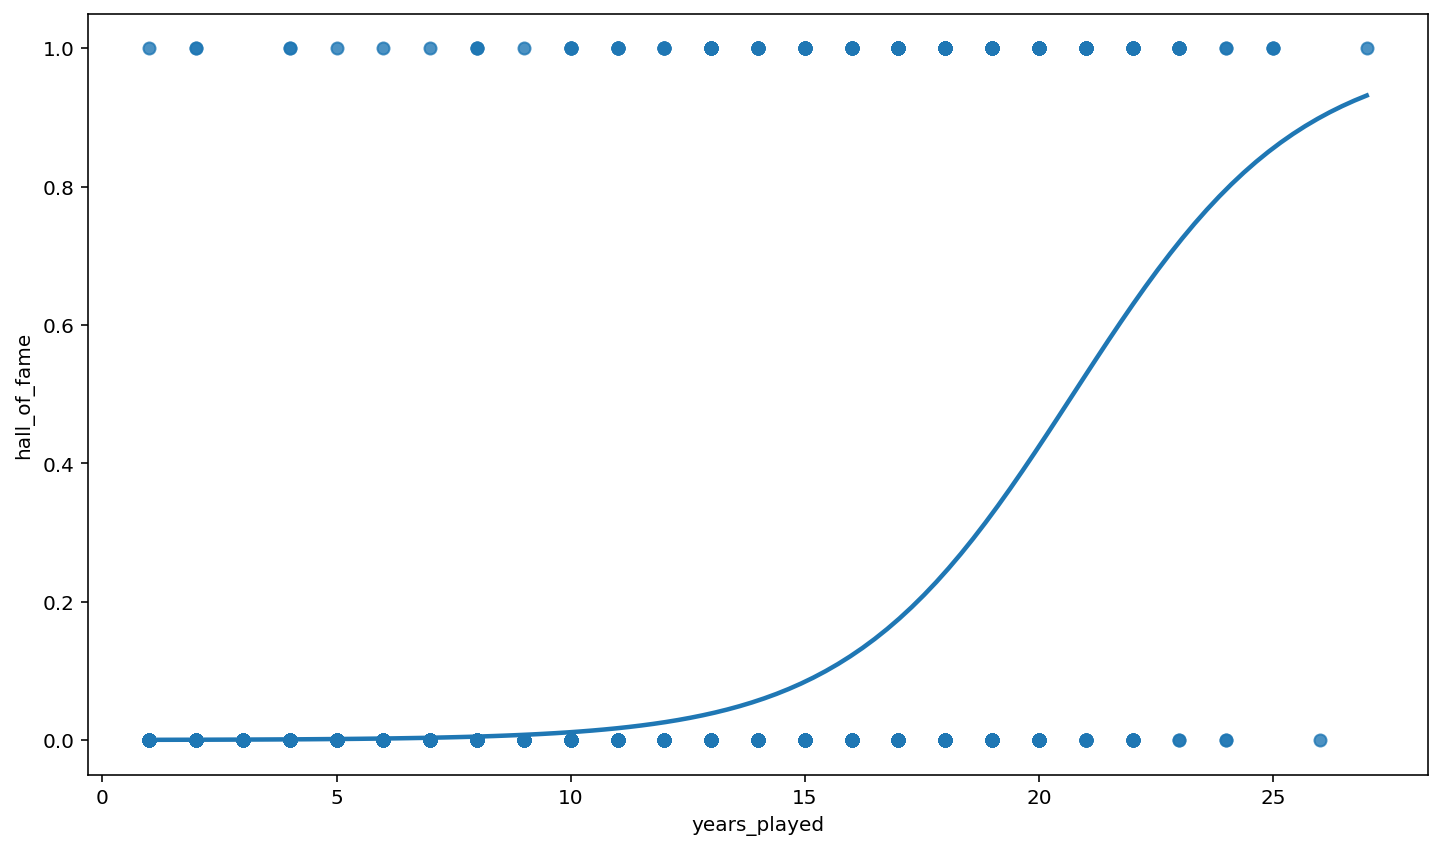

In [42]:
sns.regplot(x=batters_data['years_played'], y=batters_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_batting_average', ylabel='hall_of_fame'>

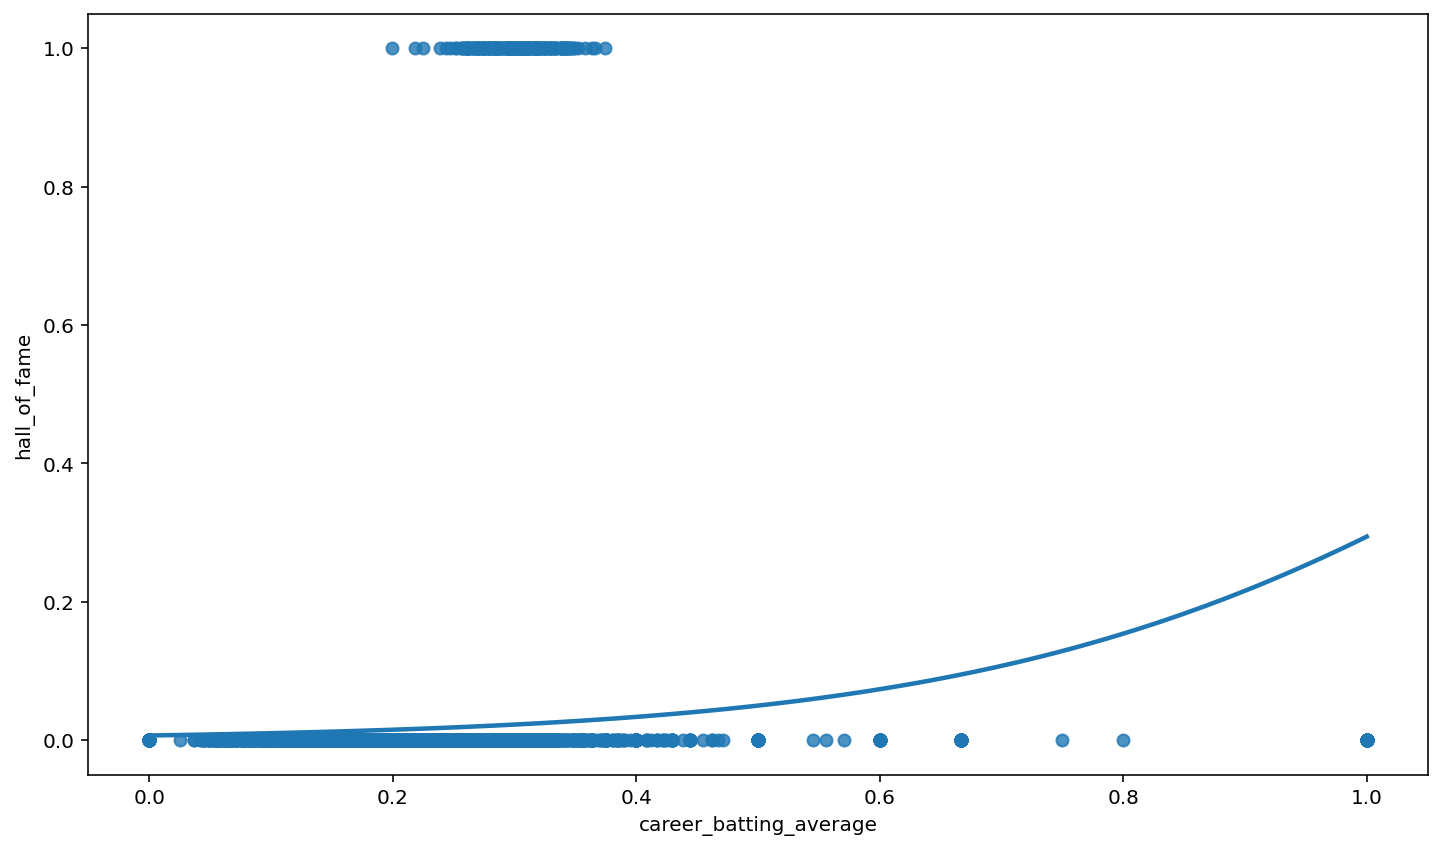

In [43]:
sns.regplot(x=batters_data['career_batting_average'], y=batters_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_HRs', ylabel='hall_of_fame'>

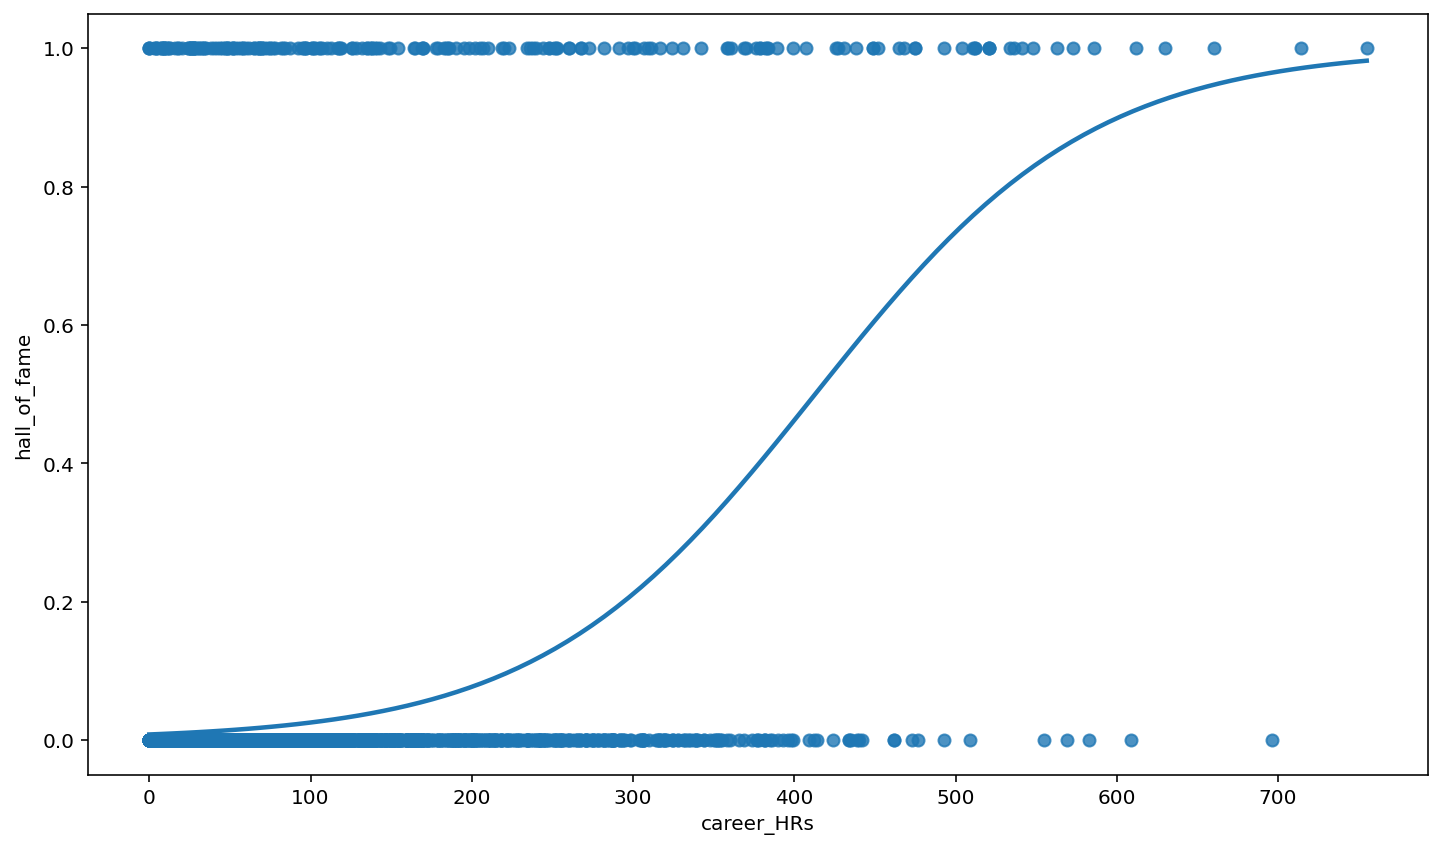

In [44]:
sns.regplot(x=batters_data['career_HRs'], y=batters_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_WAR', ylabel='hall_of_fame'>

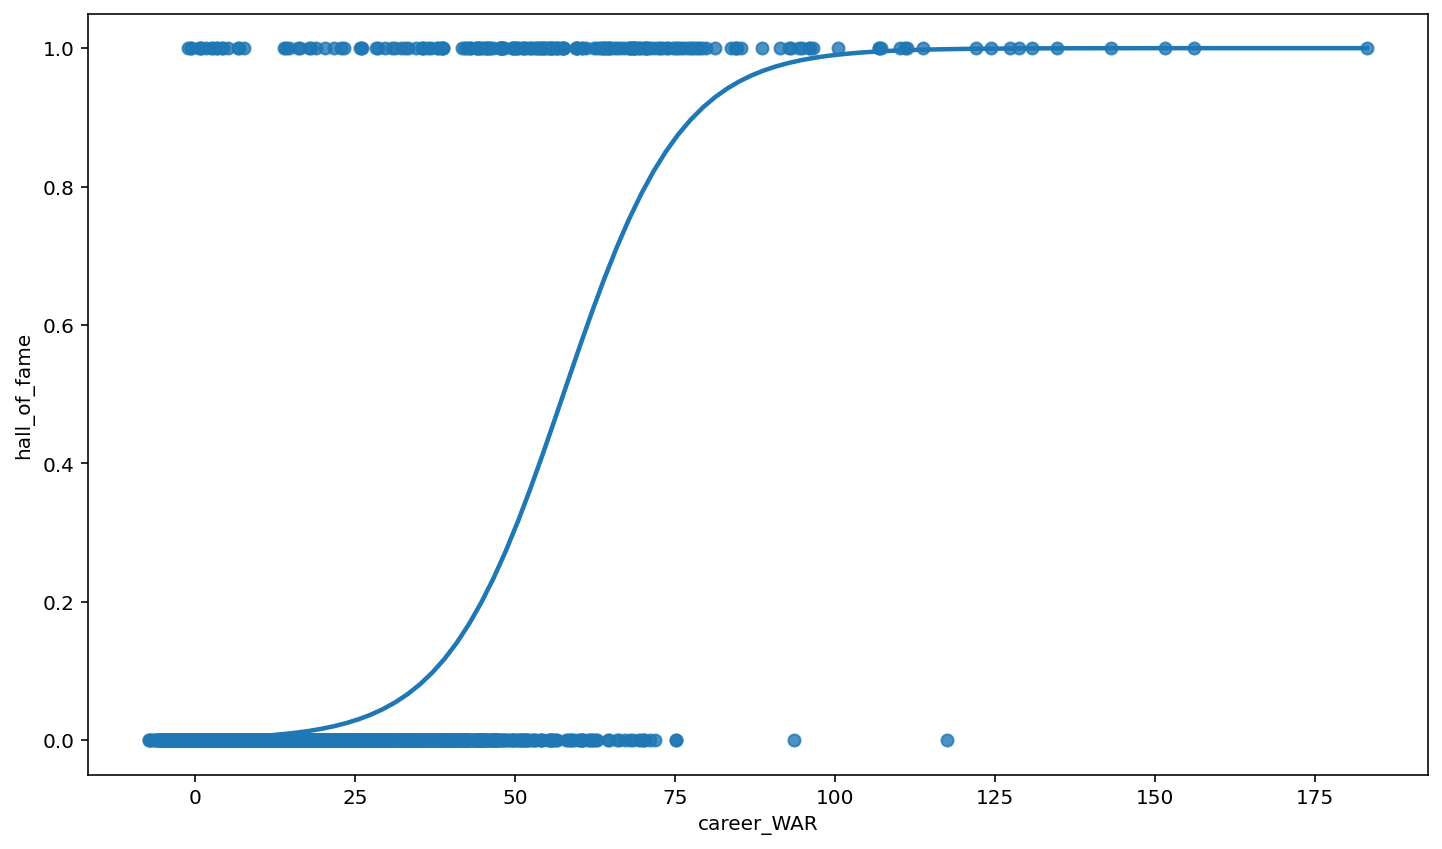

In [45]:
sns.regplot(x=batters_data['career_WAR'], y=batters_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_RBIs', ylabel='hall_of_fame'>

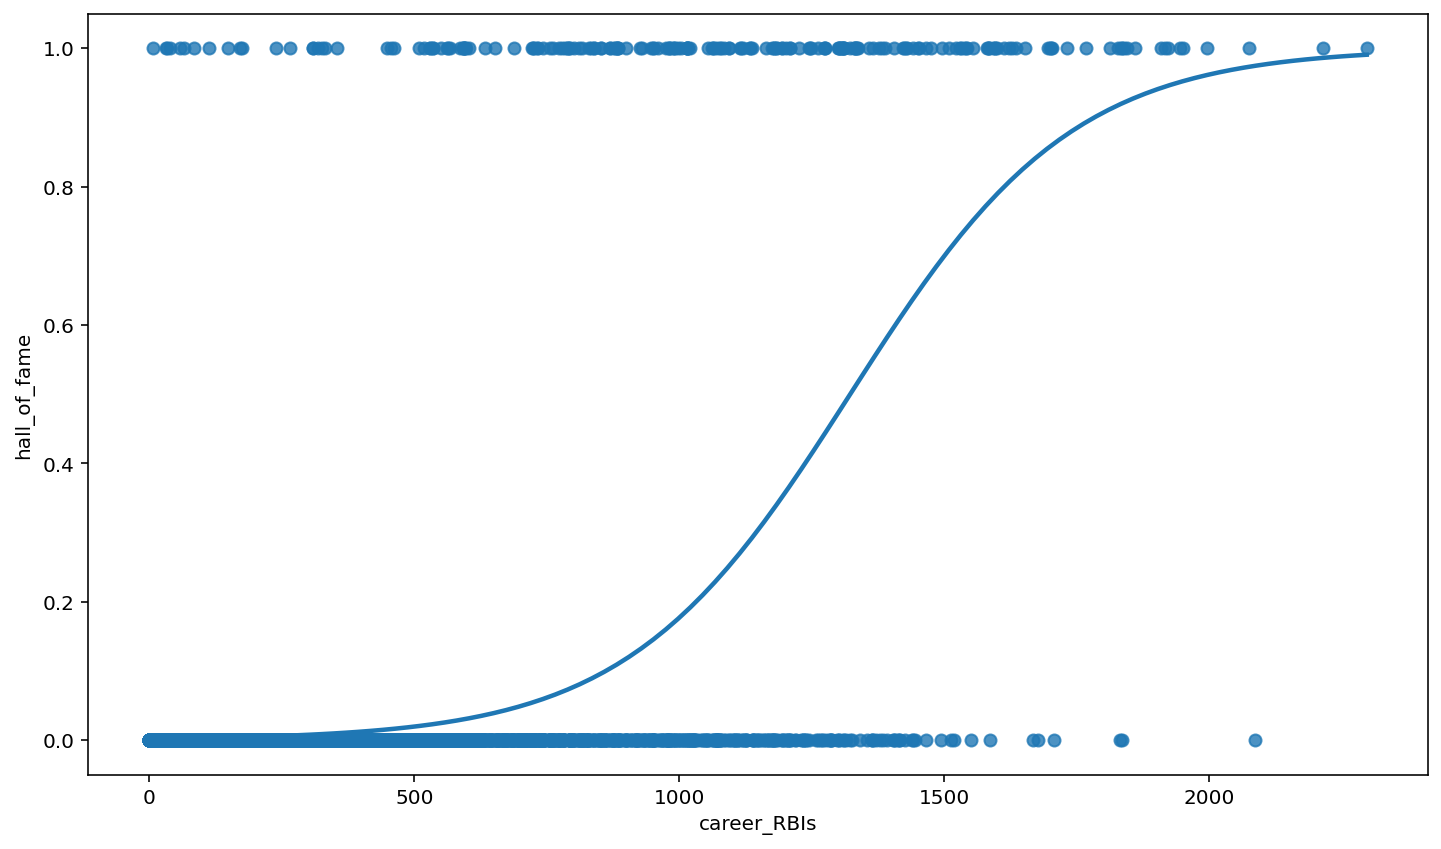

In [46]:
sns.regplot(x=batters_data['career_RBIs'], y=batters_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_SLG', ylabel='hall_of_fame'>

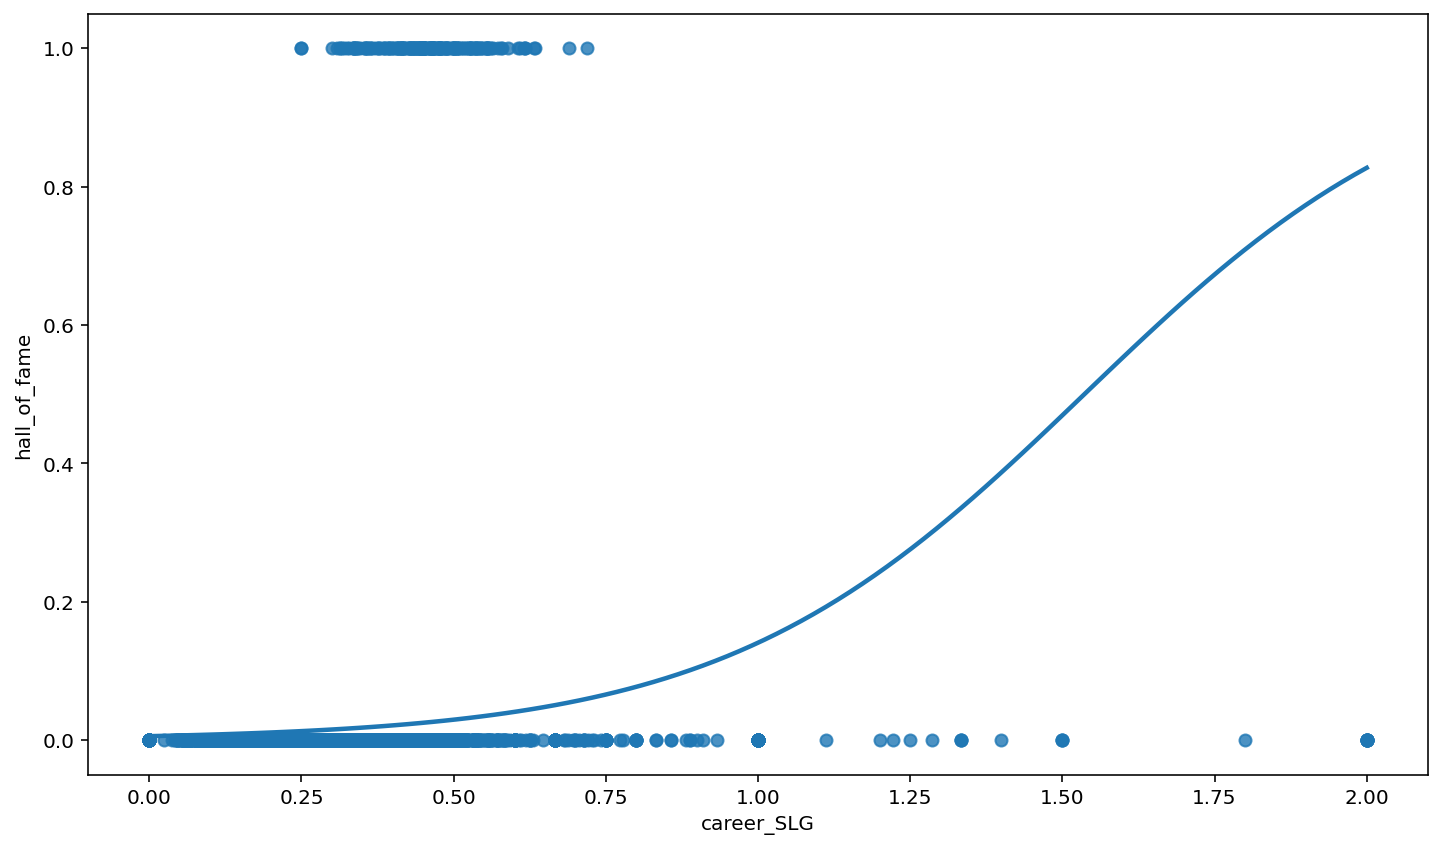

In [47]:
sns.regplot(x=batters_data['career_SLG'], y=batters_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_runs', ylabel='hall_of_fame'>

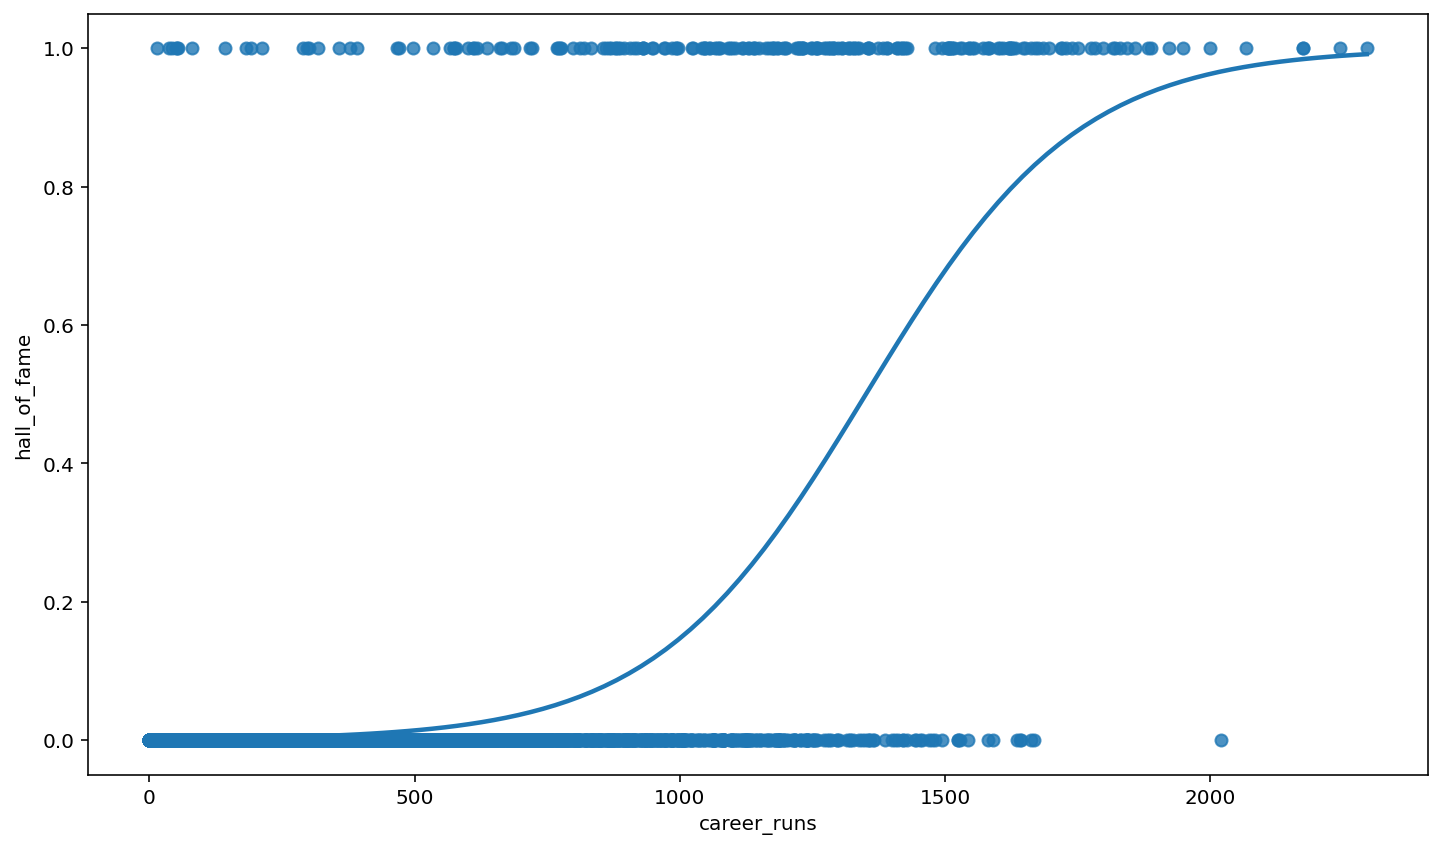

In [48]:
sns.regplot(x=batters_data['career_runs'], y=batters_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_hits', ylabel='hall_of_fame'>

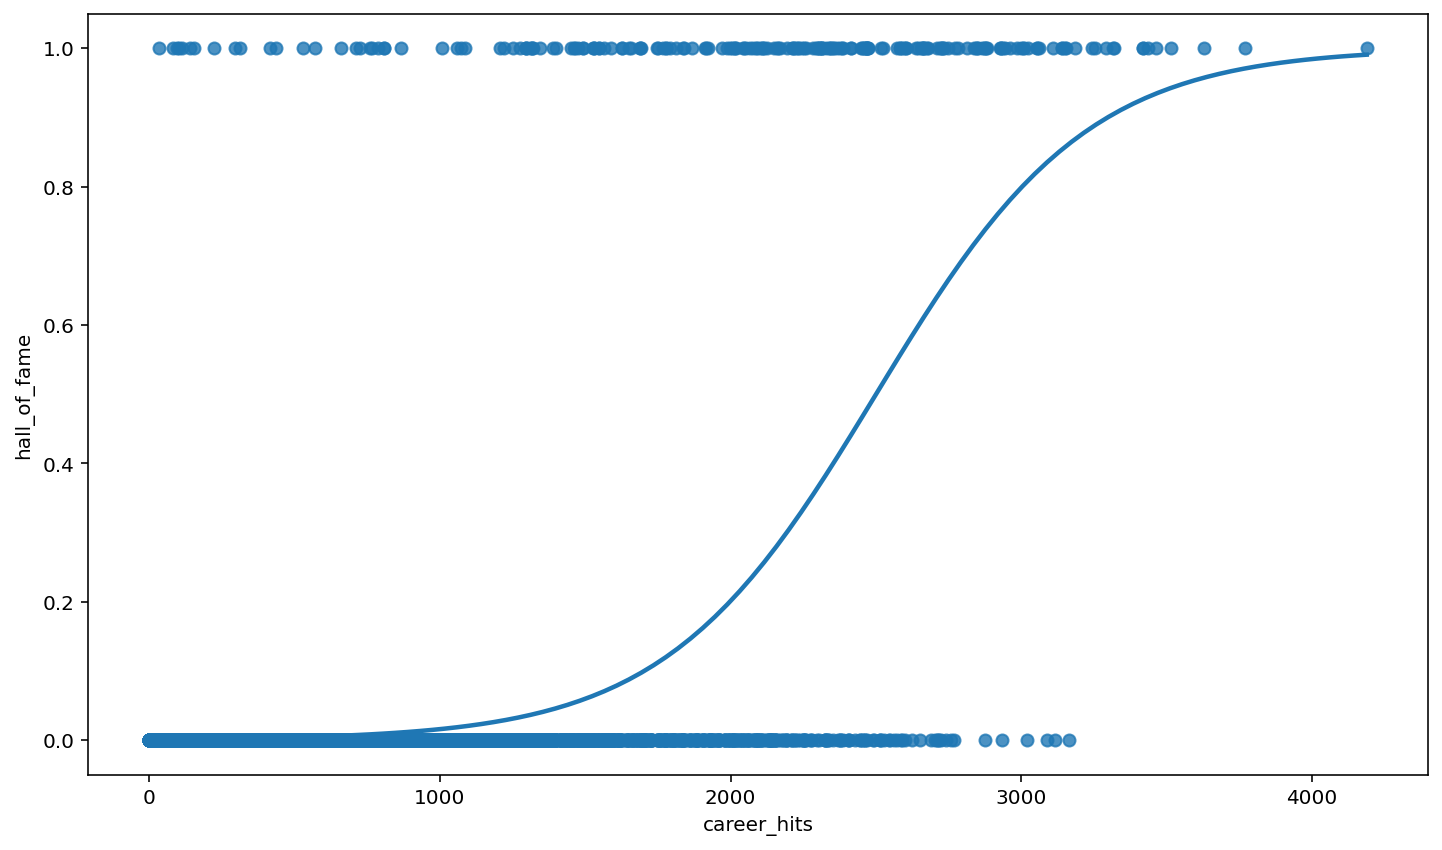

In [21]:
sns.regplot(x=batters_data['career_hits'], y=batters_data['hall_of_fame'], data=df, logistic=True, ci=None)

In [15]:
batters_data = batters_data[~batters_data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [61]:
X = batters_data.drop(['hall_of_fame','link','name','career_OPS','active_player'],axis=1)                     
Y = batters_data.hall_of_fame

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(X_train, Y_train)

p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)
score_ = model.score(X_test, Y_test)
conf_m = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)
weight = model.coef_ 

print('y_pred:', y_pred, end='\n\n')
print('score_:', score_, end='\n\n')
#print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')
print('weight', weight, sep = '\n')
print('intercept', model.intercept_, sep = '\n')

[-8.34310917]
y_pred: [0 0 0 ... 0 0 0]

score_: 0.9924778761061946

report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2220
           1       0.93      0.62      0.75        40

    accuracy                           0.99      2260
   macro avg       0.96      0.81      0.87      2260
weighted avg       0.99      0.99      0.99      2260

weight
[[ 9.40299008e-02  1.57260249e+00 -1.93177576e-03 -1.36403253e-02
   7.12803878e-02  4.48824869e-03  1.67828734e-03  2.34689769e-01
   1.81239899e+00  1.94980519e-01 -1.52294745e-01  3.68708745e-01
   4.74618193e-01 -9.90496667e-02  2.50418146e-01]]
intercept
[-8.34310917]


In [70]:
coeffs = {}
cols = (list(X.columns))
for i in range(len(cols)):
    coeffs[cols[i]] = weight[0][i]
coeffs

{'years_played': 0.09402990080100215,
 'career_batting_average': 1.572602490493626,
 'career_hits': -0.0019317757644307042,
 'career_HRs': -0.013640325278365376,
 'career_WAR': 0.07128038775818683,
 'career_RBIs': 0.004488248685339582,
 'career_runs': 0.0016782873365918864,
 'career_OBP': 0.2346897688008183,
 'career_SLG': 1.812398993571799,
 'world_series_wins': 0.19498051893293256,
 'golden_glove_awards': -0.1522947453269327,
 'mvps': 0.36870874526017655,
 'career_hitting_titles': 0.4746181927642111,
 'silver_slugger_awards': -0.0990496667082874,
 'all_star_apps': 0.2504181461044138}